In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline

# Homework 5

**Instructions:** Complete the notebook below. Download the completed notebook in HTML format. Upload assignment using Canvas.

**Due:** Feb. 9 at **2pm.**

## Exercise: AR(1) Process Simulation

For each of the AR(1) processes defined below:

1. Compute $y$ for $201$ periods (i.e., $t=0,\ldots, 200$).
2. Construct a well-labeled plot of $y$ for each simulation.
2. Print the mean and standard deviation of the stimulated process.

You may use the function from the Notebook for Lecture 10, write your own, or take a more brute force approach.

1. $y_{t} = 0.33 y_{t-1} + \epsilon_t, \; \; \; \; \epsilon \sim \mathcal{N}(0,1), \; \; \; \; y_0 = 0$

In [19]:
def AR1_Sim(coeff, sigma, y0):
    """Perform an AR(1) Simulation for 201 periods"""

    eps = np.random.normal(0, sigma, 201)
    y = np.zeros_like(eps) 
    y[0] = y0

    for t in range(len(y) - 1):
        y[t+1] = coeff * y[t] + eps[t]

    return y 

y = AR1_Sim(.033, 1, 0)

In [20]:
# print mean of y
print(np.mean(y))

# Print standard deviation of y
print(np.std(y))

-0.07968648475950033
1.0565847486937932


2. $y_{t} = y_{t-1} + \epsilon_t, \; \; \; \; \epsilon \sim \mathcal{N}(0,1), \; \; \; \; y_0 = 0$

In [21]:
y = AR1_Sim(1, 1, 0)

In [22]:
# print mean of y
print(np.mean(y))

# Print standard deviation of y
print(np.std(y))

-0.5696639535700649
2.8175792830885773


3. $y_{t} = -0.95 y_{t-1} + \epsilon_t, \; \; \; \; \epsilon \sim \mathcal{N}(0,1), \; \; \; \; y_0 = 0$

In [23]:
y = AR1_Sim(-0.95, 1, 0)

In [24]:
# print mean of y
print(np.mean(y))

# Print standard deviation of y
print(np.std(y))

0.015406112190064896
4.515348983282967


4. $y_{t} = 0.75 y_{t-1} + \epsilon_t , \; \; \; \; \epsilon \sim \mathcal{N}(0,4), \; \; \; \; y_0 = 20$

In [25]:
y = AR1_Sim(.75, 4, 20)

In [26]:
# print mean of y
print(np.mean(y))

# Print standard deviation of y
print(np.std(y))

-1.0885571916622447
6.5886802506744955


5. $y_{t} = 0.9 y_{t-1} + \epsilon_t , \; \; \; \; \epsilon \sim \mathcal{N}(0,3), \; \; \; \; y_0 = 0$

In [27]:
y = AR1_Sim(.9, 3, 0)

In [28]:
# print mean of y
print(np.mean(y))

# Print standard deviation of y
print(np.std(y))

2.7917632551854754
6.036675664677399


## Exercise: Stochastic Growth

We've seen in class that total factory productivity (TFP) in the US fluctuates over the business cycle around a long-term growth trend. That is, total factor productivity is characterized by *stochastic growth*. In this problem, you will simulate a model of TFP with stochastic growth.

### Background

Suppose that the trend component of TFP $A^{trend}$ grows smoothly at the constant rate $g$:

\begin{align}
A^{trend}_t & = (1+g)A_{t-1}^{trend}, \tag{1}
\end{align}

where $A_0$ is given. The log-deviations of actual TFP $A$ from trend TFP are determined according to an AR(1) process:

\begin{align}
\log\left(A_t/A^{trend}_t\right) & = \rho \log \left(A_{t-1} / A^{trend}_{t-1}\right) + \epsilon_t, \tag{2}
\end{align}

where $A_0$ is given and $\epsilon_t \sim \mathcal{N}(0,\sigma^2)$. Solve quation (2) for $A_t$ to get an expression for $A_t$ in terms of $A_{t-1}$, $A^{trend}_{t}$, $A^{trend}_{t-1}$, and $\epsilon_t$:

\begin{align}
A_t & = A^{trend}_t \displaystyle e^{\rho \log \left(A_{t-1} / A^{trend}_{t-1}\right) + \epsilon_t} \tag{3}
\end{align}

### Simulation

To simulate this model:

1. Specify values for $A_0$ and $A^{trend}_0$.
2. For $t = 0, 1, \ldots... T$, compute $A^{trend}_{t+1}$ using equation (1) and then compute $A_{t+1}$ using equation (3)

Use the following prameter values for this simulation

| $$A^{trend}_0$$ | $$A_0$$ | $$g$$  | $$\rho$$ | $$\sigma$$ | $$T$$ |
|-----------------|---------|--------|----------|------------|-------|
| 1               | 1       | 0.02   | 0.7      | 0.025      | 101   |

In the follwing cell, simulate $A^{trend}$ and $A$ using the parameter values provided.

In [2]:
# Simulate the stochastic growth model of TFP

A_trend_0 = 1
A_0 = 1
g = .02 
p = .7 
sigma = .025 
T = 101 

eps = np.random.normal(0, sigma**2, T)  # epsilon
A_trend = np.zeros(T) 
A = np.zeros(T) 

A_trend[0] = A_trend_0
A[0] = A_0

for t in range(T-1):
    A_trend[t+1] = (1 + g) * A_trend[t]
    A[t+1] = A_trend[t+1] * np.exp(p * np.log(A[t]/A_trend[t]) + eps[t])


Contruct a well-labeled plot of the simulated values of $A$ and $A^{trend}$

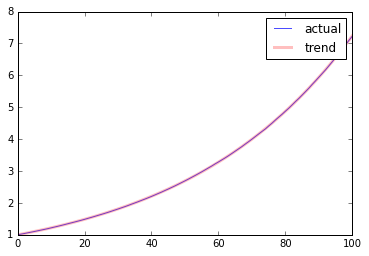

In [6]:
# Construct a plot of simulated TFP with its trend with:
#    1. Actual line: blue with lw=1, alpha=0.7, label = 'actual'
#    2. Trend line:  red with lw=3, alpha=0.25, label = 'trend'

plt.plot(A, c = "b", lw=1, alpha=0.7, label = 'actual')
plt.plot(A_trend, c = "r", lw=3, alpha=0.25, label = 'trend')
plt.legend()
plt.show()

Contruct a well-labeled plot of the simulated values of $\log \left(A/A^{trend}\right)$

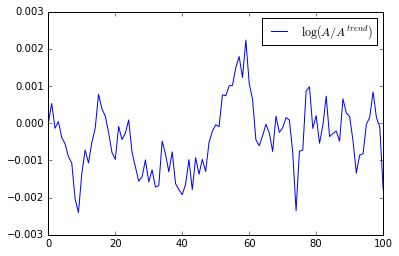

In [12]:
# Construct a plot of simulated log deviation of TFP from trend

plt.plot(np.log(A/A_trend), label = r"$\log(A/A^{trend})$")
plt.legend()
plt.show()

Compute the mean and standard deviation of $\log \left(A/A^{trend}\right)$

In [25]:
# print mean of log(A/A trend)
print(np.mean(np.log(A/A_trend)))

# Print standard deviation of log(A/A trend)
print(np.std(np.log(A/A_trend)))

0.0003007571348971
0.0008080994651872107


## Exercise: Questions for Prescott (1983) Reading


The following questions are about Edward Prescott's 1986 article "Theory  Ahead of Business Cycle Measurement" from the Fall 1986 issue of the Minneapolis Fed's *Quarterly Review* (link to article: [https://www.minneapolisfed.org/research/qr/qr1042.pdf](https://www.minneapolisfed.org/research/qr/qr1042.pdf)). The article is a summary of the research agenda of the author, his main collaborator, Finn Kydland, and others. That agenda entailed incorporating stochastic growth of TFP into the neoclassical growth model (essentially a Solow model but with the saving rate determined as a consequence a of utility maximization problem) as a way of modeling business cycle fluctuations. This line of research would later be called *real business cycle* theory.

The below questions are specifically about:
* Pages 9-11 (including the table on page 12)
* The final paragraph on page 21

**Question:** On page 10, Prescott writes that the "models constructed within this theoretical framework are necessarily highly abstract. Consequently they are necessarily false." What does Kydland mean by this? In what sense are abstract models necessarily false? 

**Answer**

Kydland comments on the complexity of some models, yet, a hypothesis test would reject them. 

**Question:** On page 10, Prescott lists two reasons for why he doesn't like the term *business cycle*. What is the first reason and what does it mean?

**Answer**

  The first reason talks about how people may be mislead by the fact that "business cycle" is not referring to a time series and it should be separated from growth. 

**Question:** Table 1 on page 12 shows that household consumption measures in the US fluctuate less than investment measures. What is the intuition for why consumption varies less than investment?

**Answer**

  

**Question:** In the last paragraph of page 21, to what does Prescott attribute economic fluctuations? Can you think of any reasons why this statement was, and still is, controversial?

**Answer**

  

  

  

  